<a href="https://colab.research.google.com/github/Mirsha-RG/interacting-with-api-python-project-tutorial/blob/main/API_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
#!pip install spotipy
#!pip install dotenv
#!pip install spotipy --upgrade

In [73]:
import requests
import os
import pandas as pd
from IPython.display import Image, display
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials



#Inicializar la biblioteca Spotipy

In [74]:
CLIENT_ID= '758d179e50ee4ca88f977ae2d2dcbbab'
CLIENT_SECRET= 'ac129f78d1a24afa9a40b8574d86532d'

In [122]:
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET))

In [86]:
# comprobar que la conexion es aprobada
def check_conexion (URL):
  respuesta = requests.get(url)
  # Verificamos que la solicitud fue exitosa
  if respuesta.status_code == 200:
    return print("Conexión exitosa")
  else:
    return print("Error al conectarse:", respuesta.status_code)

In [90]:
url = 'https://open.spotify.com/artist/3DiDSECUqqY1AuBP8qtaIa'
check_conexion(url)

Conexión exitosa


#Realizar solicitudes a la API

In [126]:
# Seleccion del artista
birdy_uri = 'spotify:artist:3DiDSECUqqY1AuBP8qtaIa'
results = spotify.artist_albums(birdy_uri, album_type='album')
albums = results['items']
artistId = '3DiDSECUqqY1AuBP8qtaIa'
top = spotify.artist_top_tracks(artistId)

In [125]:
# albums existentes en spotify
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Hell's Kitchen (Original Broadway Cast Recording) (Deluxe Edition)
Hell’s Kitchen (Original Broadway Cast Recording)
The Diary Of Alicia Keys 20
Inolvidable Mexico City Mexico (Live from Auditorio Nacional Mexico City, Mexico)
Inolvidable Bogota Colombia (Live from Movistar Arena Bogota, Colombia)
Inolvidable Santiago Chile (Live from Movistar Arena Santiago, Chile)
Inolvidable Buenos Aires Argentina (Live from Movistar Arena Buenos Aires, Argentina)
Inesquecivel Sao Paulo Brazil (Live From Allianz Parque Sao Paulo Brazil)
Queen Charlotte: A Bridgerton Story (Covers from the Netflix Series)
Santa Baby
KEYS II
KEYS
ALICIA: The Selects
ALICIA
HERE
Alicia Keys - VH1 Storytellers
Girl On Fire
The Element Of Freedom
As I Am (Expanded Edition)
No One (Remixes)
Unplugged
If I Ain't Got You (Remixes)
The Diary Of Alicia Keys (Expanded Edition)
The Diary Of Alicia Keys
Songs In A Minor (Deluxe Edition)
Songs In A Minor


In [107]:
# canciones mas populares
songs = []
for track in top['tracks']:
    songs.append({
        'name': track['name'],
        'popularity': track['popularity'],
        'duration_min': track['duration_ms'] / 60000
    })

for song in songs:
    print(f"{song['name']} | Popularidad: {song['popularity']} | Duración: {song['duration_min']} min")


If I Ain't Got You | Popularidad: 84 | Duración: 3.8117666666666667 min
My Boo | Popularidad: 82 | Duración: 3.724 min
No One | Popularidad: 79 | Duración: 4.24205 min
Fallin' | Popularidad: 79 | Duración: 3.5033333333333334 min
Girl on Fire | Popularidad: 78 | Duración: 3.748666666666667 min
Un-thinkable (I'm Ready) (feat. Drake) - Remix | Popularidad: 76 | Duración: 4.700433333333334 min
Finally | Popularidad: 74 | Duración: 3.59305 min
Empire State of Mind (Part II) Broken Down | Popularidad: 73 | Duración: 3.608 min
You Don't Know My Name | Popularidad: 70 | Duración: 6.112216666666667 min
Un-thinkable (I'm Ready) | Popularidad: 69 | Duración: 4.154 min


#Transformar a Pandas DataFrame

In [118]:
# Analizar relación estadística
df = pd.DataFrame(songs)
df_numericas = df[['popularity', 'duration_min']]
print(df_numericas.corr())


              popularity  duration_min
popularity       1.00000      -0.47529
duration_min    -0.47529       1.00000


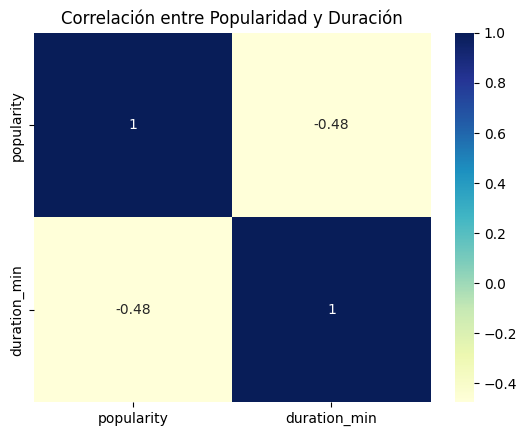

In [119]:
import seaborn as sns
sns.heatmap(df_numericas.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlación entre Popularidad y Duración")
plt.show()

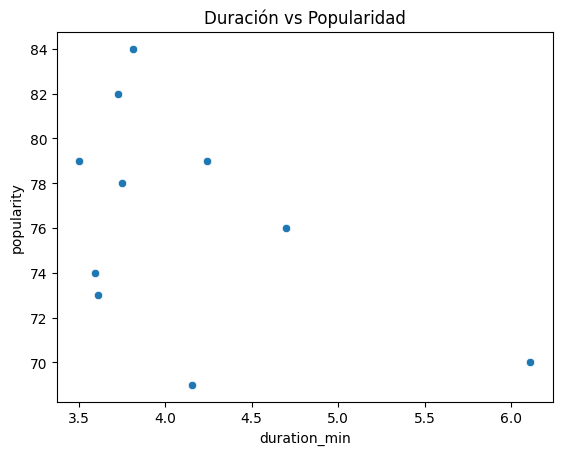

In [120]:
sns.scatterplot(data=df, x='duration_min', y='popularity')
plt.title('Duración vs Popularidad')
plt.show()

El análisis de correlación entre la duración (en minutos) y la popularidad de las canciones muestra un coeficiente de -0.475, lo que indica una correlación negativa moderada. Esto sugiere que, en general, las canciones más largas tienden a ser menos populares, al menos en el caso del artista analizado.